In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = '../big_data/rb-suppliers-challange/receipts.csv'
texts_path = '../big_data/rb-suppliers-challange/texts/'

In [3]:
dataset = pd.read_csv(dataset_path, index_col=['id'])
print("Initial shape:", dataset.shape)

dataset = dataset[~dataset.supplier_name.isnull()]
dataset = dataset[~dataset.currency_code.isnull()]
np.random.seed(1)
shuffled = dataset.reindex(np.random.permutation(dataset.index))
print("Shape after filter:", dataset.shape)
print("Columns names:")
print(dataset.columns.values)

unique_supplier_names = shuffled.supplier_name.unique()
unique_currency_codes = shuffled.currency_code.unique()

print("Dataset size {0}".format(len(shuffled)))
print("Unique supplier names {0}".format(len(unique_supplier_names)))
print("Unique currency names {0}".format(len(unique_currency_codes)))

print("Currency codes:")
print(unique_currency_codes)

('Initial shape:', (9009, 15))
('Shape after filter:', (9009, 15))
Columns names:
['id.1' 'created_at' 'currency_code' 'total_amount' 'vat_amount' 'date'
 'due_date' 'invoice_number' 'received_via' 'supplier_name' 'ocr_method'
 'manual_review' 'account_default_currency' 'payment_type' 'document_type']
Dataset size 9009
Unique supplier names 1948
Unique currency names 20
Currency codes:
['AUD' 'USD' 'GBP' 'CAD' 'NZD' 'EUR' 'ZAR' 'HKD' 'BGN' 'AED' 'JPY' 'RUB'
 'SGD' 'BRL' 'UAH' 'IDR' 'THB' 'CNY' 'INR' 'NOK']


In [4]:
def find_class_frequencies(dataset, group_col='currency_code'):
    codes = dataset.groupby(group_col).size()
    return codes

currency_codes = find_class_frequencies(dataset)
print('Unique currencies:', len(currency_codes))
print(currency_codes)

currency_names = currency_codes.index.values
currency_counts = currency_codes.values
# plt.bar(range(len(currency_names.tolist())), currency_counts.tolist(), align='edge', alpha=0.5, tick_label=currency_names.tolist())
# plt.xticks(rotation=70);

('Unique currencies:', 20)
currency_code
AED       7
AUD     800
BGN     294
BRL       1
CAD      88
CNY       1
EUR     443
GBP    5658
HKD       9
IDR       1
INR       1
JPY       1
NOK       1
NZD     362
RUB       3
SGD      11
THB       1
UAH       2
USD    1215
ZAR     110
dtype: int64


('Unique suppliers:', 1948)
supplier_name
Temple Kiosk                                 1
Industry Zen                                 1
Southeastern                                 1
Indiegogo                                    1
Southern Sun Bloemfontein                    1
Il Lido Italian Canteen                      1
Il Fornaio Caffe Del Mondo                   1
Information Commissioner's Office            1
Il Fornaio                                   1
Spago                                        1
Iberica Glasgow                              1
Spanska Vas                                  1
IKRA                                         1
Specsavers                                   1
III Forks Steakhouse                         1
Spaghetti Kitchen                            1
Infusion Restaurant                          1
Ingredients Cafe                             1
Inkwenkwezi Game Ran                         1
Ivy Bar                                      1
Sorte.co.uk       

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


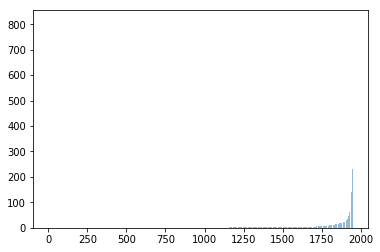

In [5]:
suppliers = find_class_frequencies(dataset, 'supplier_name')
print('Unique suppliers:', len(suppliers))

suppliers.sort(['values'], ascending=[0])
print(suppliers)

print(suppliers["Taxi Receipt"])

suppliers_names = suppliers.index.values
suppliers_counts = suppliers.values
plt.bar(range(len(suppliers_names)), suppliers_counts, align='edge', alpha=0.5);

In [6]:
taxisDS = dataset[(dataset.supplier_name == "Taxi Receipt")]

In [7]:
taxisDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
49779530,49779530,2017-01-24 10:01:04.065527,GBP,10.00,0.0,2017-01-24,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt
49208415,49208415,2017-01-18 05:40:53.683356,BGN,12.51,0.0,2017-01-17,NaN,NaN,via_supplier_email,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt
47317648,47317648,2016-12-23 17:22:18.626957,GBP,6.00,0.0,2016-12-23,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt
47253393,47253393,2016-12-22 19:35:13.770385,BGN,15.00,0.0,2016-12-22,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt
47138262,47138262,2016-12-21 16:02:00.626446,BGN,15.00,0.0,2016-12-21,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt


In [8]:
othersDS = dataset[(dataset.supplier_name != "Taxi Receipt")]

In [9]:
othersDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
49927358,49927358,2017-01-25 14:01:42.251023,USD,585.70,0.0,2017-01-02,2017-01-30,386764,via_supplier_email,Intercom,cloud_vision,t,GBP,NaN,invoice
49897860,49897860,2017-01-25 09:11:29.719365,USD,1013.00,0.0,2017-01-09,NaN,NaN,via_supplier_email,Mixpanel,cloud_vision,t,GBP,credit/debit card,receipt
49845841,49845841,2017-01-24 21:14:12.473547,GBP,618.47,0.0,2017-01-24,NaN,NaN,via_mobile,Brasserie Blanc,cloud_vision,t,GBP,credit/debit card,receipt
49825653,49825653,2017-01-24 16:31:36.352851,GBP,2400.00,400.0,2017-01-24,2017-01-31,03626,via_supplier_email,Finatal,cloud_vision,t,GBP,NaN,invoice
49825652,49825652,2017-01-24 16:31:36.121024,GBP,6000.00,1000.0,2017-01-24,2017-01-31,03628,via_supplier_email,Finatal,cloud_vision,t,GBP,NaN,invoice


In [10]:
np.random.seed(1)
shuffledTaxisDS = taxisDS.reindex(np.random.permutation(taxisDS.index))


test_slice = int(len(shuffledTaxisDS) * (10.0 / 100))
print(test_slice)
train_set_taxisDS = shuffledTaxisDS[:test_slice]
print len(train_set_taxisDS)
valid_set_taxisDS = shuffledTaxisDS[test_slice:test_slice*3]
print len(valid_set_taxisDS)

81
81
162


In [11]:
train_set_taxisDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
11345314,11345314,2015-04-10 10:55:49.298564,USD,65.00,0.0,2015-04-10,NaN,NaN,via_mobile,Taxi Receipt,abbyy_win_11,t,GBP,NaN,receipt
1860166,1860166,2013-10-15 10:22:57.380708,AUD,51.28,0.0,2013-10-15,NaN,NaN,via_mobile,Taxi Receipt,abbyy_win_11,t,GBP,credit/debit card,receipt
4114268,4114268,2014-05-21 06:58:31.398449,GBP,16.00,0.0,2014-05-21,NaN,NaN,via_mobile,Taxi Receipt,abbyy_win_11,t,GBP,NaN,receipt
556314,556314,2013-01-15 16:25:47.754421,GBP,5.20,0.0,2013-01-13,NaN,NaN,via_email,Taxi Receipt,abbyy_win_11,f,GBP,NaN,receipt
46792723,46792723,2016-12-18 10:26:05.776785,GBP,12.00,0.0,2016-12-18,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt


In [12]:
valid_set_taxisDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
41507635,41507635,2016-10-19 11:33:22.783078,AUD,21.00,0.0,2016-10-19,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,credit/debit card,receipt
6758280,6758280,2014-10-20 09:24:07.827039,USD,54.50,0.0,2014-10-19,NaN,NaN,via_mobile,Taxi Receipt,NaN,t,GBP,credit/debit card,receipt
2872767,2872767,2014-02-11 15:34:06.016858,GBP,22.64,0.2,2013-10-19,NaN,NaN,via_mobile,Taxi Receipt,abbyy_win_11,t,GBP,credit/debit card,receipt
40498352,40498352,2016-10-07 07:41:31.727705,GBP,16.00,0.0,2016-10-05,NaN,NaN,via_mobile,Taxi Receipt,cloud_vision,t,GBP,NaN,receipt
988752,988752,2013-05-27 10:38:28.95966,AUD,14.87,0.0,2013-05-27,NaN,NaN,via_mobile,Taxi Receipt,abbyy_win_11,t,GBP,credit/debit card,receipt


In [13]:
import os
from shutil import copyfile

for index, row in train_set_taxisDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/" + row["supplier_name"]):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/" + row["supplier_name"])
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/" + row["supplier_name"] + "/"+str(index)+".jpg")
    except IOError:
        pass
    
for index, row in valid_set_taxisDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/" + row["supplier_name"]):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/" + row["supplier_name"])
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/" + row["supplier_name"] + "/"+str(index)+".jpg")
    except IOError:
        pass

In [14]:
othersDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
49927358,49927358,2017-01-25 14:01:42.251023,USD,585.70,0.0,2017-01-02,2017-01-30,386764,via_supplier_email,Intercom,cloud_vision,t,GBP,NaN,invoice
49897860,49897860,2017-01-25 09:11:29.719365,USD,1013.00,0.0,2017-01-09,NaN,NaN,via_supplier_email,Mixpanel,cloud_vision,t,GBP,credit/debit card,receipt
49845841,49845841,2017-01-24 21:14:12.473547,GBP,618.47,0.0,2017-01-24,NaN,NaN,via_mobile,Brasserie Blanc,cloud_vision,t,GBP,credit/debit card,receipt
49825653,49825653,2017-01-24 16:31:36.352851,GBP,2400.00,400.0,2017-01-24,2017-01-31,03626,via_supplier_email,Finatal,cloud_vision,t,GBP,NaN,invoice
49825652,49825652,2017-01-24 16:31:36.121024,GBP,6000.00,1000.0,2017-01-24,2017-01-31,03628,via_supplier_email,Finatal,cloud_vision,t,GBP,NaN,invoice


In [15]:
np.random.seed(1)
print len(othersDS)
shuffledOtherDS = othersDS.reindex(np.random.permutation(othersDS.index))


test_slice = int(len(shuffledOtherDS) * (10.0 / 100))
print(test_slice)
train_set_otherDS = shuffledOtherDS[:test_slice]
print len(train_set_otherDS)
valid_set_otherDS = shuffledOtherDS[test_slice:test_slice*3]
print len(valid_set_otherDS)

8195
819
819
1638


In [16]:
train_set_otherDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
1642672,1642672,2013-09-16 13:50:53.272265,GBP,9.45,1.40,2013-09-16,NaN,NaN,via_mobile,Le Pain Quotidien,abbyy_win_11,t,GBP,credit/debit card,receipt
4376791,4376791,2014-06-09 10:15:31.639692,USD,24.00,0.00,2014-06-09,2014-07-20,NaN,via_supplier_email,Balsamiq,pdf_reader+raw_text,t,GBP,credit/debit card,invoice
4661434,4661434,2014-06-28 02:42:44.35685,USD,37.00,0.00,2014-06-27,NaN,NaN,via_mobile,Pied Piper Bar & Grill,abbyy_win_11,t,GBP,credit/debit card,receipt
1649745,1649745,2013-09-17 09:39:55.582667,GBP,5.70,0.54,2013-09-17,NaN,NaN,via_mobile,L'eto Caffe,abbyy_win_11,t,GBP,cash,receipt
13545410,13545410,2015-06-14 19:15:47.480819,GBP,1341.60,0.00,2015-06-12,2015-07-20,1 of 1,via_supplier_email,Laura Brett,pdf_reader,t,GBP,NaN,invoice


In [17]:
valid_set_otherDS[:5]

,id.1,created_at,currency_code,total_amount,vat_amount,date,due_date,invoice_number,received_via,supplier_name,ocr_method,manual_review,account_default_currency,payment_type,document_type
id,,,,,,,,,,,,,,,
42064318,42064318,2016-10-26 04:55:49.976364,EUR,4.50,0.23,2016-10-26,NaN,NaN,via_mobile,Alto Cafe SARL,cloud_vision,t,GBP,credit/debit card,receipt
14910007,14910007,2015-07-21 10:49:19.515613,GBP,62.55,9.27,2015-07-14,NaN,NaN,via_mobile,The White Swan,tesseract,t,GBP,NaN,receipt
6015440,6015440,2014-09-14 10:15:16.926829,USD,199.00,0.00,2014-09-14,NaN,NaN,via_supplier_email,New Relic,pdf_reader+raw_text,t,GBP,credit/debit card,receipt
34261042,34261042,2016-07-16 04:53:30.561286,AUD,4.00,0.00,2016-07-16,NaN,NaN,via_mobile,Ground Control Cafe,cloud_vision,t,GBP,credit/debit card,receipt
16331016,16331016,2015-08-26 08:38:35.000651,EUR,3.70,0.19,2015-08-26,NaN,NaN,via_mobile,Paul,tesseract,t,GBP,credit/debit card,receipt


In [18]:
import os
from shutil import copyfile

for index, row in train_set_otherDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/Other"):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/Other")
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/train/Other/"+str(index)+".jpg")
    except IOError:
        pass
    
for index, row in valid_set_otherDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/Other"):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/Other")
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/valid/Other/"+str(index)+".jpg")
    except IOError:
        pass

In [19]:
path = "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample/"

In [20]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [21]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: GeForce GTX 960 (CNMeM is disabled, cuDNN 5110)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [22]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=4

In [23]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [26]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=5)

Found 689 images belonging to 2 classes.
Found 1365 images belonging to 2 classes.
Epoch 1/5
689/689 [==============================] - 64s - loss: 0.7343 - acc: 0.8360 - val_loss: 0.6928 - val_acc: 0.8850

In [27]:
vgg.fit(batches, val_batches, nb_epoch=3)

Epoch 1/3
689/689 [==============================] - 64s - loss: 0.5117 - acc: 0.8839 - val_loss: 0.5383 - val_acc: 0.8908

In [28]:
vgg.fit(batches, val_batches, nb_epoch=3)

Epoch 1/3
689/689 [==============================] - 63s - loss: 0.3371 - acc: 0.9158 - val_loss: 0.4958 - val_acc: 0.8952

In [29]:
taxisDS = dataset[(dataset.supplier_name == "Le Pain Quotidien")]

In [30]:
othersDS = dataset[(dataset.supplier_name != "Le Pain Quotidien")]

In [41]:
np.random.seed(1)
shuffledTaxisDS = taxisDS.reindex(np.random.permutation(taxisDS.index))
print(len(shuffledTaxisDS))


test_slice = int(len(shuffledTaxisDS) * (10.0 / 100))
print(test_slice)
train_set_taxisDS = shuffledTaxisDS[:test_slice]
print(len(train_set_taxisDS))
valid_set_taxisDS = shuffledTaxisDS[test_slice:test_slice*3]
print(len(valid_set_taxisDS))

182
18
18
36


In [42]:
import os
from shutil import copyfile

for index, row in train_set_taxisDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/" + row["supplier_name"]):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/" + row["supplier_name"])
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/" + row["supplier_name"] + "/"+str(index)+".jpg")
    except IOError:
        pass
    
for index, row in valid_set_taxisDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/" + row["supplier_name"]):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/" + row["supplier_name"])
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/" + row["supplier_name"] + "/"+str(index)+".jpg")
    except IOError:
        pass

In [45]:
np.random.seed(1)
print(len(othersDS))
shuffledOtherDS = othersDS.reindex(np.random.permutation(othersDS.index))


test_slice = int(len(shuffledOtherDS) * (10.0 / 100))
print(test_slice)
train_set_otherDS = shuffledOtherDS[:test_slice]
print(len(train_set_otherDS))
valid_set_otherDS = shuffledOtherDS[test_slice:test_slice*3]
print(len(valid_set_otherDS))

8827
882
882
1764


In [46]:
import os
from shutil import copyfile

for index, row in train_set_otherDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/Other"):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/Other")
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/train/Other/"+str(index)+".jpg")
    except IOError:
        pass
    
for index, row in valid_set_otherDS.iterrows():
    
    if not os.path.exists("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/Other"):
        os.makedirs("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/Other")
    
    try:
        copyfile("/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/valid/Other/"+str(index)+".jpg")
    except IOError:
        pass

In [47]:
path = "/home/app/nmarinov/datathon-receipt-bank/big_data/rb-suppliers-challange/images/sample1/"

In [48]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=4

In [49]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=5)

Found 687 images belonging to 2 classes.
Found 1371 images belonging to 2 classes.
Epoch 1/5
687/687 [==============================] - 64s - loss: 0.4377 - acc: 0.9694 - val_loss: 0.4115 - val_acc: 0.9745

In [50]:
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
687/687 [==============================] - 63s - loss: 0.4927 - acc: 0.9694 - val_loss: 0.3997 - val_acc: 0.9752

In [51]:
#import os
#from shutil import copyfile

#for index, row in dataset.iterrows():
    
#    if (suppliers[row["supplier_name"]] > 50):
#    
#        if not os.path.exists("/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/" + row["supplier_name"]):
#            os.makedirs("/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/" + row["supplier_name"])
#    
#        try:
#            copyfile("/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".jpg", "/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/" + row["supplier_name"] + "/"+str(index)+".jpg")
#        except FileNotFoundError:
#            try:
#                copyfile("/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".pdf", "/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/" + row["supplier_name"] + "/"+str(index)+".pdf")
#            except:
#                copyfile("/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/"+str(index)+".png", "/home/nmarinov/hd/Dev/datathon/datathon-receipt-bank/big_data/rb-suppliers-challange/images/" + row["supplier_name"] + "/"+str(index)+".png")